In [1]:
## ======== YOUR CODE HERE ======== ##

## Import numpy, pandas, matplotlib, seaborn

from pandas import*
from numpy import*
import pandas as pd
import numpy as np
from seaborn import*
import seaborn as sns
from matplotlib import*
import matplotlib.pyplot as plt

## Import Logistic regression and SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
## Import Confusion matrix, plot confusion matrix, classification report, accuracy score, auc-roc score and roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Import Label encoder, label binarizer and Standard Scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler


## ================================ ##

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = read_csv('SA2021_W3_Data.csv')

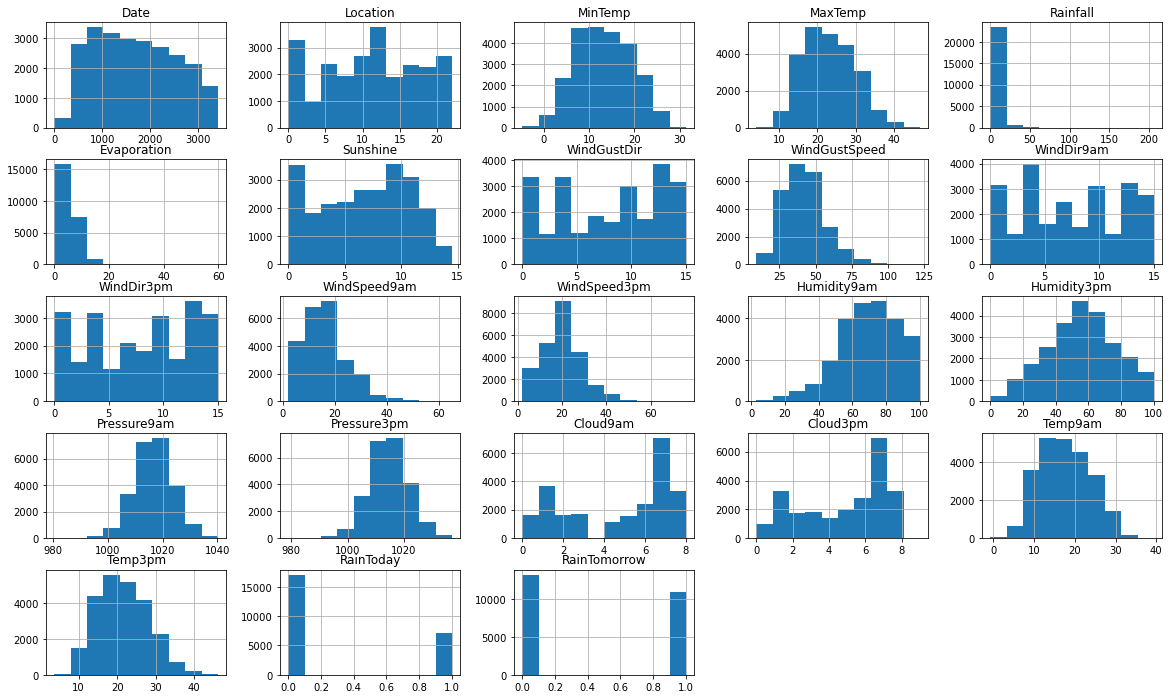

In [8]:
fig, ax= plt.subplots(figsize=(20,12))
hist = data.hist(ax = ax)

In [7]:
data1 = data.drop(columns=['Evaporation','Sunshine','Cloud3pm','Cloud9am','Date','Location'],axis=1)
data1.head(2)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,18.3,35.4,0.0,15,31,0,6,17,9,17,14,1012.8,1010.7,26.3,34.0,0,1
1,12.0,21.1,0.0,11,22,15,10,9,9,70,60,1022.3,1020.2,16.2,19.4,0,0


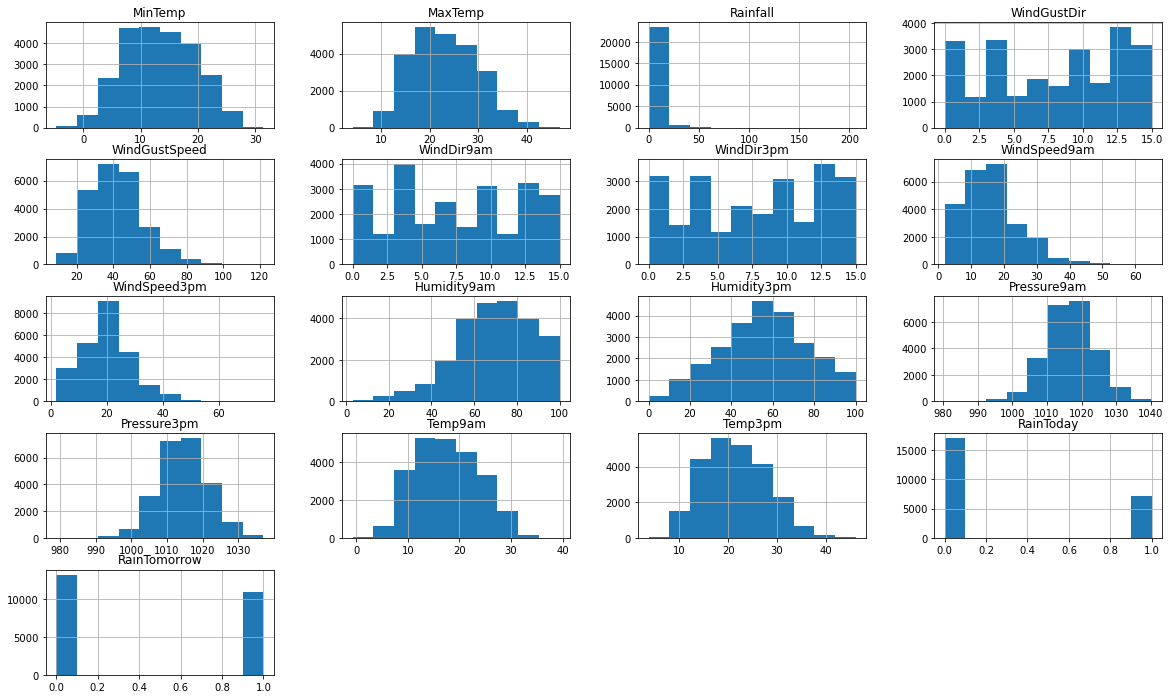

In [9]:
fig, ax= plt.subplots(figsize=(20,12))
hist = data1.hist(ax = ax)

In [4]:
data.shape

(24196, 23)

In [11]:
data1.shape

(24196, 17)

In [12]:
data1['RainTomorrow'].unique()

array([1, 0])

In [13]:
data1['RainToday'].unique()

array([0, 1])

In [14]:
data.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed      int64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [3]:
from sklearn import preprocessing
standa = preprocessing.MinMaxScaler()
standa.fit(data)
datafinal = pd.DataFrame(standa.transform(data), index=data.index, columns=data.columns)

In [19]:
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0


In [20]:
datafinal.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.836310,0.5,0.637119,0.733021,0.0,0.178930,0.565517,1.000000,0.194690,0.0,...,0.144330,0.14,0.541039,0.546552,0.375,0.777778,0.673317,0.714623,0.0,1.0
1,0.168375,0.0,0.462604,0.398126,0.0,0.040134,0.337931,0.733333,0.115044,1.0,...,0.690722,0.60,0.700168,0.710345,0.250,0.777778,0.421446,0.370283,0.0,0.0


In [23]:
datafinal.dtypes

Date             float64
Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

In [5]:
x = data.drop(['RainTomorrow'],axis=1)
y = data['RainTomorrow']


xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=2021)

In [27]:
print(xtrain.shape) # X_train
print(ytest.shape) # X_test
print(xtest.shape) # y_train
print(ytrain.shape) # y_test

(18147, 22)
(6049,)
(6049, 22)
(18147,)


In [6]:
scaler=StandardScaler()
### fit vs fit_transform

X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)


In [7]:
model_class = LogisticRegression()
model_class.fit(X_train,ytrain)

LogisticRegression()

### ROC

In [56]:
fpr, tpr, thresholds = roc_curve(ytest, model_class.predict(X_test))
roc_auc = auc(fpr, tpr)
roc_auc*100

79.33187274711464

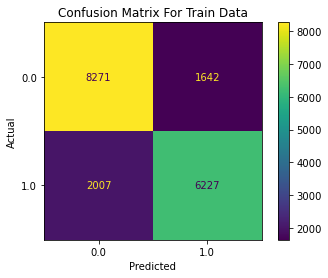

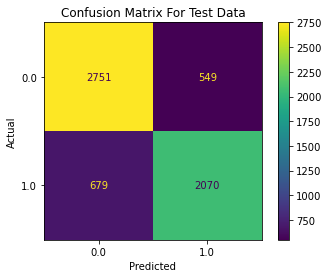

In [34]:
plot_confusion_matrix(model_class, X_train, ytrain)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Train Data')


plot_confusion_matrix(model_class,X_test,ytest)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Test Data')
plt.show()

In [35]:
print("Traing score is:", model_class.score(X_train,ytrain)*100)
print("Test score is:", model_class.score(X_test,ytest)*100)
print("Accuracy is For Test:",accuracy_score(ytest, model_class.predict(X_test))*100)
print("Accuracy is For Train:",accuracy_score(ytrain, model_class.predict(X_train))*100)

Traing score is: 79.89199316691465
Test score is: 79.69912382211936
Accuracy is For Test: 79.69912382211936
Accuracy is For Train: 79.89199316691465


In [37]:
model_c1 = SVC()
model_c1.fit(X_train,ytrain)

0.8098859315589354

In [8]:
model_C = SVC(C=1, gamma='scale')
model_C.fit(X_train, ytrain)
print('Score for C1:',model_C.score(X_test, ytest))

model_f = SVC(C=50, gamma='scale')
model_f.fit(X_train, ytrain)
print('Score for C50:',model_f.score(X_test, ytest))

print('Accuracy for C1:', accuracy_score(ytest,model_C.predict(X_test))*100)
print('Accuracy for C5:', accuracy_score(ytest,model_f.predict(X_test))*100)

Score for C1: 0.8098859315589354
Score for C50: 0.7834352785584394
Accuracy for C1: 80.98859315589354
Accuracy for C5: 78.34352785584394


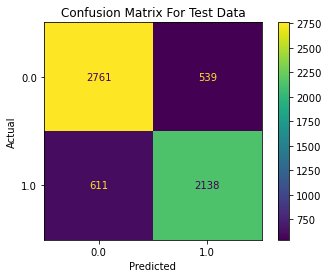

In [42]:
plot_confusion_matrix(model_C,X_test,ytest)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Test Data')
plt.show()

### ROC Score

In [53]:
fpr, tpr, thresholds = roc_curve(ytest, model_C.predict(X_test))
roc_auc = auc(fpr, tpr)
roc_auc

0.8072020128531587

In [51]:
fpr, tpr, thresholds = roc_curve(ytest, model_f.predict(X_test))
roc_auc = auc(fpr, tpr)
roc_auc

0.7811374384073547

###  the average Cross-Validation Score

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
print(cross_val_score(model_C, X_train, ytrain, cv=5)*100)

[81.43250689 80.52341598 81.62028107 81.34472306 80.98649766]


In [40]:
score = np.mean(cross_val_score(model_C, X_train, ytrain))

In [41]:
print(score*100)

81.18148493122817


### Recall and F1 score

In [14]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [27]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [28]:
prediction = model_class.predict(X_test)

In [32]:
print('Accuracy:', accuracy_score(ytest, prediction))
print('F1 score:', f1_score(ytest, prediction))
print('Recall:', recall_score(ytest, prediction))
print('Precision:', precision_score(ytest, prediction))
print('\n clasification report:\n', classification_report(ytest,prediction))
print('\n confussion matrix:\n',confusion_matrix(ytest, prediction))

Accuracy: 0.7969912382211936
F1 score: 0.7712369597615499
Recall: 0.7530010913059294
Precision: 0.7903780068728522

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      3300
           1       0.79      0.75      0.77      2749

    accuracy                           0.80      6049
   macro avg       0.80      0.79      0.79      6049
weighted avg       0.80      0.80      0.80      6049


 confussion matrix:
 [[2751  549]
 [ 679 2070]]


In [36]:
prediction2 = model_C.predict(X_test)
print('Accuracy:', accuracy_score(ytest, prediction2))
print('F1 score:', f1_score(ytest, prediction2))
print('Recall:', recall_score(ytest, prediction2))
print('Precision:', precision_score(ytest, prediction2))
print('\n clasification report:\n', classification_report(ytest,prediction2))
print('\n confussion matrix:\n',confusion_matrix(ytest, prediction2))

Accuracy: 0.8098859315589354
F1 score: 0.7880575009214892
Recall: 0.7777373590396508
Precision: 0.7986552110571535

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      3300
           1       0.80      0.78      0.79      2749

    accuracy                           0.81      6049
   macro avg       0.81      0.81      0.81      6049
weighted avg       0.81      0.81      0.81      6049


 confussion matrix:
 [[2761  539]
 [ 611 2138]]


In [37]:
prediction3 = model_f.predict(X_test)
print('Accuracy:', accuracy_score(ytest, prediction3))
print('F1 score:', f1_score(ytest, prediction3))
print('Recall:', recall_score(ytest, prediction3))
print('Precision:', precision_score(ytest, prediction3))
print('\n clasification report:\n', classification_report(ytest,prediction3))
print('\n confussion matrix:\n',confusion_matrix(ytest, prediction3))

Accuracy: 0.7834352785584394
F1 score: 0.7603366264178558
Recall: 0.7559112404510732
Precision: 0.7648141332351859

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      3300
           1       0.76      0.76      0.76      2749

    accuracy                           0.78      6049
   macro avg       0.78      0.78      0.78      6049
weighted avg       0.78      0.78      0.78      6049


 confussion matrix:
 [[2661  639]
 [ 671 2078]]
